## XOR Truth Table-
X Y Z

0 0 0

0 1 1

1 0 1

1 1 0

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
N = 4 
D = 2

X = np.array([
        [0, 0], 
        [0, 1],
        [1, 0],
        [1, 1]
    ])

In [3]:
X

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [4]:
T = np.array([0, 1, 1, 0])

In [7]:
ones = np.array([[1]*N]).T  # bias term
ones

array([[1],
       [1],
       [1],
       [1]])

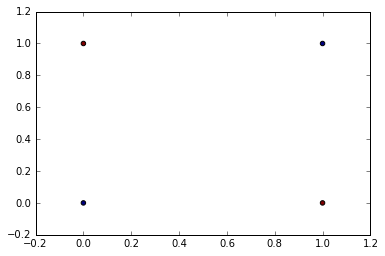

In [13]:
plt.scatter(X[:,0], X[:,1], c = T)
plt.show()

In [14]:
# So, the trouble with Logistic Regresison is that you can't find a line that will give you a perfect classification.

In [15]:
# So, the trick is to add another dimension to our input and turn it into a 3d problem than a 2d problem and then we can draw
# a plane between two data sets.

In [19]:
xy = np.matrix(X[:,0]*X[:,1]).T
xy

matrix([[0],
        [0],
        [0],
        [1]])

In [20]:
Xb = np.array(np.concatenate((ones, xy, X), axis = 1))
Xb

array([[1, 0, 0, 0],
       [1, 0, 0, 1],
       [1, 0, 1, 0],
       [1, 1, 1, 1]])

In [21]:
T

array([0, 1, 1, 0])

In [22]:
# Now let's randomly initialize the weights-
w = np.random.randn(D + 2)

# Calculate the model output-
z = Xb.dot(w)

# Defining the sigmoid function-
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Calculating the probability of the target class
Y = sigmoid(z)

In [23]:
Y  # you can see due to random weights the classificatin is all over . So, we will need to do the gradient descent
# so that we reach the minimum of the Cross Entropy function.

array([ 0.73355638,  0.88973429,  0.87431808,  0.98710417])

In [26]:
# Calculating the cross-entropy error-
def cross_entropy(T, Y):
    E = 0
    for i in range(N):
        if T[i] == 1:
            E -= np.log(Y[i])
        else:
            E -= np.log(1 - Y[i])
    return E

In [28]:
learning_rate = 0.001
error = []
for i in range(5000):
    e = cross_entropy(T, Y)
    error.append(e)
    if i % 500 == 0:
        print(e)
    
    # gradient descent weight update with regularization-
    w += learning_rate * (Xb.T.dot(T - Y) - 0.01*w)  # l-2 reg
    
    # recalculate Y
    Y = sigmoid(Xb.dot(w))

5.92458770102
4.06385037616
3.1754560975
2.83718911103
2.67306639716
2.55700975299
2.46016452447
2.37520050785
2.29919499065
2.23036891877


In [29]:
print("Final w: ", w)
print("Final Prediction Rate: ", np.mean(T == np.round(Y)))

Final w:  [-0.03403716 -1.38241651  0.33888749  0.38230628]
Final Calculation Rate:  1.0
